# **Multilayer Perceptron - rice_ml**
This notebook demonstrates how to use the MLPClassifier within the rice_ml package. It demonstrates it in an informative way that also analyzes the results, mirroring a standard use case of the classes.

Note that when using this in robust model selection, k-fold cross-validation and deeper hyperparameter tuning is recommended. In this example, since it's main goal is demonstrating the classes, we will not do as deep of hyperparameter tuning, and will compare every test using the same random state (42).

This notebook shows how to:
- Use 'MLPClassifier' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Evaluate MLP on a binary classification task

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [MLP Classification](#mlp-classification)
  - [Model Training](#model-training)
  - [Results](#results)

## Algorithm
Multilayer Perceptron is a structure of multiple connected dense layers that take in input data, transform it across hidden layers, and output predictions. There is an input layer, and output layer, and one or more hidden transformation layers in between.

Each layer contains a set of neurons, which compute a weighted sum of its inputs, adds a bias term, and applies an activation function. As data moves through the layers, each layer learns more about the data. The initial layers learn simple patterns, and then later layers start to learn higher-level features.

Training is done using backpropogation. The algorithm performs a forward pass, computing all the things mentioned above, and producing a prediction, then a loss function is used to measure how far off that prediction is. Loss gradients and biases are computed moving backwards through the layers (backpropogation). Every pass trains the model better as biases and weights are adjusted for different aspects. All of these adjustments occur within the hidden layers, and the model continues passes until either the loss is less than the user input total loss (tol), or it reaches the max iterations.

By adjusting the number of layers and many other aspects, the model can model a wide range of relationships, linear or nonlinear. It is very powerful and flexible.


![KNN Graph Example](../images/mlp_example.webp)
Source: [Geeks For Geeks](https://www.geeksforgeeks.org/deep-learning/multi-layer-perceptron-learning-in-tensorflow/)


### Pros vs Cons
#### Pros
- Flexibility
- Efficient training
- Scales very well
- Works for a wide range of datasets
#### Cons
- Requires careful tuning
- Requires a lot of data
- Harder to interpret decisions (given the hidden layer abstraction)
- Can overfit without regularization techniques.
- Computationally expensive


#### Note
This implementation uses ReLU activation for hidden layers and sigmoid
activation for the output layer. Training is performed using backpropagation
with binary cross-entropy loss. The network can have an arbitrary number
of hidden layers with configurable sizes.
This implementation is limited to binary outputs. Multiclass outputs are possible,
but not supported in this implementation.

## Data Preparation
We will be using the MNIST digits dataset. It is a widely used benchmark for image classification. It contains 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels.
For sake of runtime, we will be using a random 10,000 data point sample from the dataset.

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from rice_ml.utilities import normalize, train_test_split

np.random.seed(42)

## Given that this implementation only supports binary outputs, we will use only 4 and 9 only.
### We are using these two because they tend to look similar, and other models have shown most
### of their inaccuracies are between these two. 
X_raw, y_raw = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False
)

mask = (y_raw == '4') | (y_raw == '9')

X_raw = X_raw[mask]
y_raw = y_raw[mask]

## To form binary outputs
### 0 will represent '4' and 1 will represent '9'
y_raw = (y_raw == '9').astype(int)

X shape: (13782, 784)
y shape: (13782,)
X Overall Summary:
Mean: 0.122
Std: 0.298
Before normalization:
Mean (first 5 features): [0. 0. 0. 0. 0.]
Std  (first 5 features): [0. 0. 0. 0. 0.]


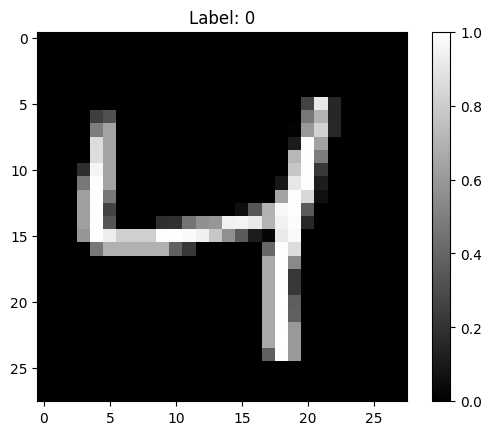

In [12]:
X = np.asarray(X_raw)
y = np.asarray(y_raw)

# Scaling
X = X / 255.0
y = y.astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("X Overall Summary:")
print(f"Mean: {X.mean():.3f}")
print(f"Std: {X.std():.3f}")

print("Before normalization:")
print("Mean (first 5 features):", np.round(X.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X.std(axis=0)[:5], 2))

image = X[0].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Label: {y[0]}")
plt.colorbar()
plt.show()

## MLP Classification
### Model Training

We will now fit an MLP Classifier on the above data, analyze it, and look at some potential improvements using normalization.
We will also look at a couple different sets of hyperparemeters to highlight the importance of careful tuning.

MLP Classification Accuracy: 0.970


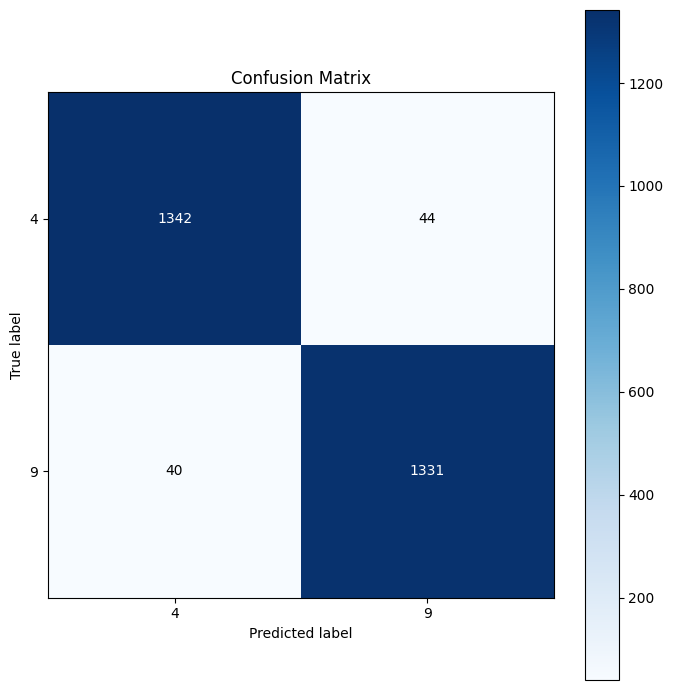

In [22]:
from rice_ml.supervised_learning.multilayer_perceptron import MLPClassifier
from rice_ml.utilities import confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Small hidden layer.
model = MLPClassifier(hidden_layer_sizes=(8,), lr=0.1, random_state=42, tol=1e-5)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])


MLP Classification Accuracy: 0.498


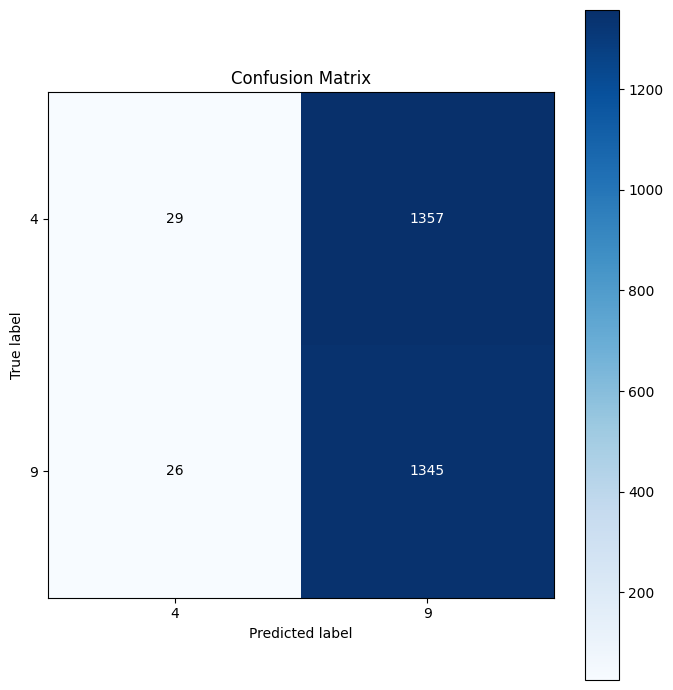

In [33]:
from rice_ml.supervised_learning.multilayer_perceptron import MLPClassifier
from rice_ml.utilities import confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Small hidden layer.
# Very large TOL
model = MLPClassifier(hidden_layer_sizes=(8,), lr=0.1, random_state=42, tol=1e-3)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])


MLP Classification Accuracy: 0.969


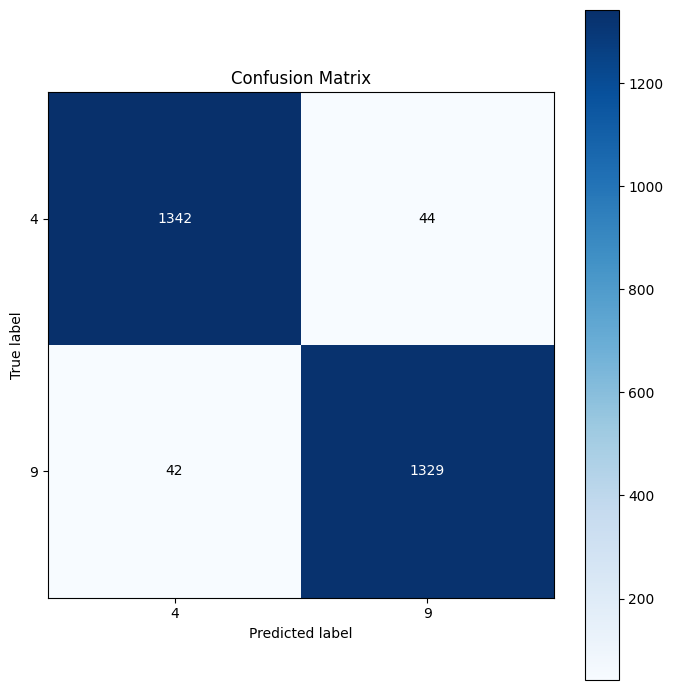

In [26]:
# Balanced layers (first layer 32, second layer 16)
model = MLPClassifier(hidden_layer_sizes=(32,16), lr=0.1, random_state=42, tol=1e-7)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])

MLP Classification Accuracy: 0.969


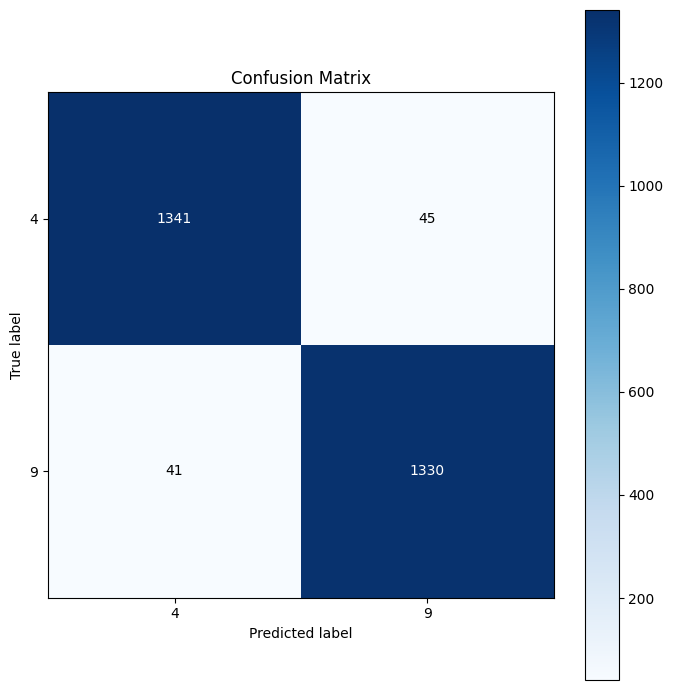

In [29]:
# Wide network (two 64 neuron layers, high potential for overfitting)
model = MLPClassifier(hidden_layer_sizes=(64,64), lr=0.1, random_state=42, tol=1e-7)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])

MLP Classification Accuracy: 0.497


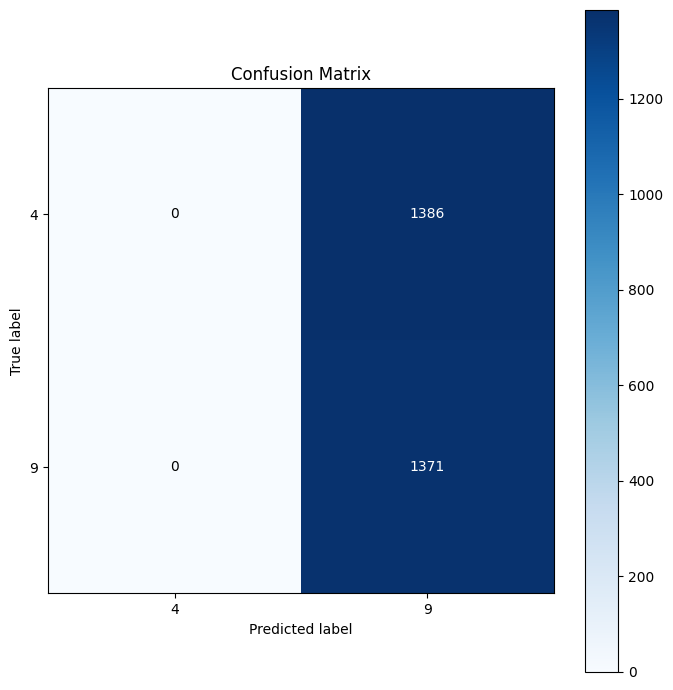

In [32]:
# Three layers (often unecessary for digits data)
model = MLPClassifier(hidden_layer_sizes=(64,32, 16), lr=0.1, random_state=42, tol=1e-7)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])

MLP Classification Accuracy: 0.968


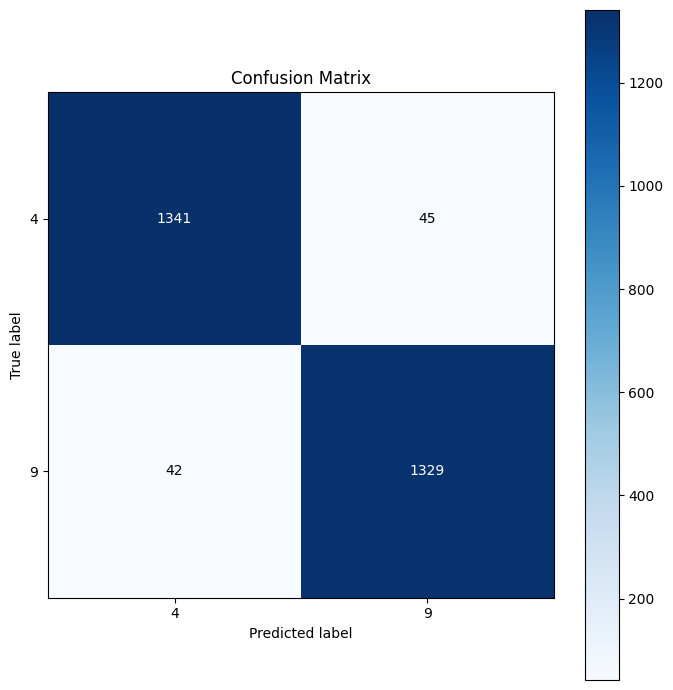

In [31]:
# Adjusted network (one 64 neuron layer, one 32 neuron layer, adjustment from the potential overfitting above)
model = MLPClassifier(hidden_layer_sizes=(64,32), lr=0.1, random_state=42, tol=1e-7)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])

Many of these runs took 30 or more seconds, so we can see that this algorithm is a costly one, but we can also see that we get some great results from it. While other models struggles, with 4s and 9s, some of these hyperparemeter settings performed wonderfully.

There are some clear learning points here as well.
As you can see, the first iteration does very well, showing that complex and deep hidden layers are likely not necessary for this data. In the second iteration, we can see that a TOL that is too high can cause early returns and an innacurate model.

In the other iterations, we can see that two large layers are unecessary, as it produces similar results to the simpel initial iteration and the final adjusted iteration.
We can also see that three layers is not beneficial for this data.

Since MLP uses gradient descent, normalization can be extremely valuable, so let's see if it improves the model at all. We will be using the simple 8 neuron single hidden layer model, as it performed the best, and simplicity is important for interpretability.

#### Z-Score Normalization

After zscore normalization:
Mean (first 5 features): [0. 0. 0. 0. 0.]
Std  (first 5 features): [0. 0. 0. 0. 0.]


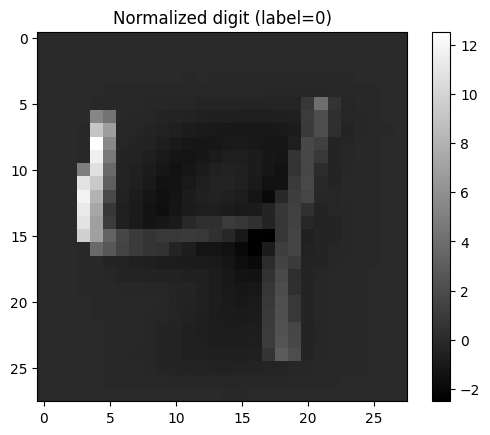

In [34]:
X = np.asarray(X)
X_norm = normalize(X, method="zscore")

print("After zscore normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))

image_norm = X_norm[0].reshape(28, 28)

plt.imshow(image_norm, cmap="gray")
plt.title(f"Normalized digit (label={y[0]})")
plt.colorbar()
plt.show()

This normalization makes the image look darker, so it may be less well-defined. Let's see how the model does.

MLP Classification Accuracy: 0.983


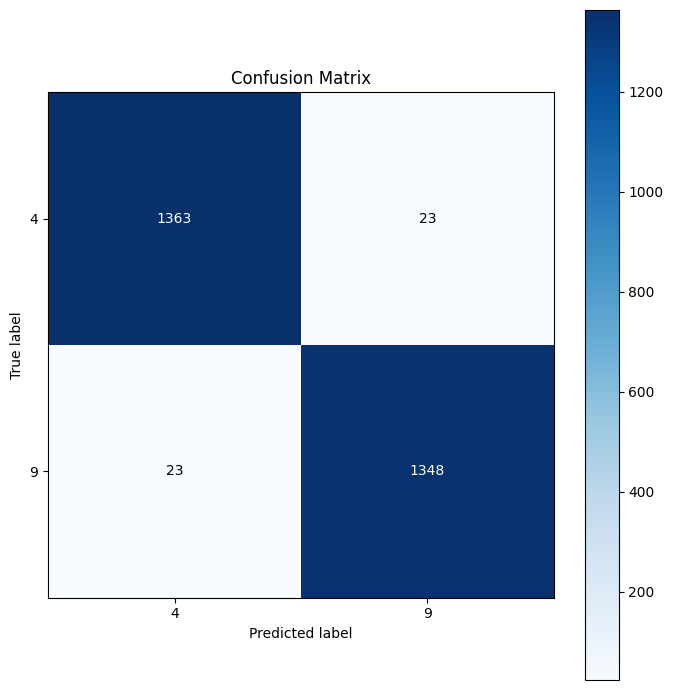

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Normalize on the training data to avoid data leakage.
X_train, stats = normalize(X_train, method="zscore", return_stats=True)
X_test = normalize(X_test, method="zscore", stats=stats)

model = MLPClassifier(hidden_layer_sizes=(8,), lr=0.1, random_state=42, tol=1e-5)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])


We can see a clear boost to the model accuracy when we normalize the data. This is an extremely accurate model and highlights the benefit of a normalization. We will also test out a minmax normalization to see how the model is affected.

#### Minmax Normalization

After robust normalization:
Mean (first 5 features): [0. 0. 0. 0. 0.]
Std  (first 5 features): [0. 0. 0. 0. 0.]


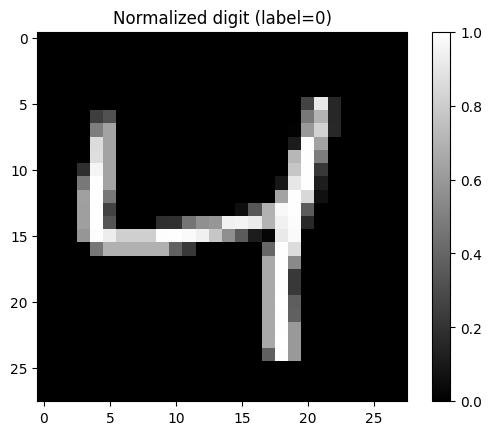

In [42]:
X = np.asarray(X)
X_norm = normalize(X, method="minmax")

print("After robust normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))

image_norm = X_norm[0].reshape(28, 28)

plt.imshow(image_norm, cmap="gray")
plt.title(f"Normalized digit (label={y[0]})")
plt.colorbar()
plt.show()

MLP Classification Accuracy: 0.970


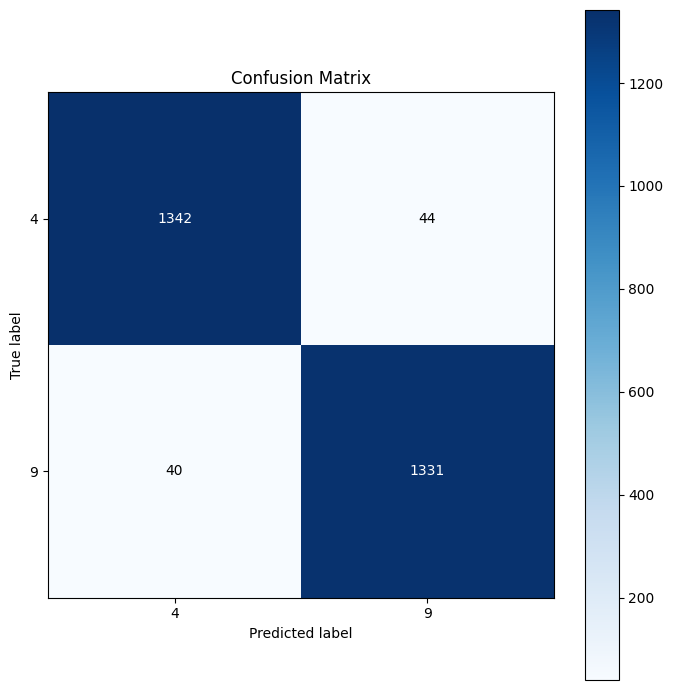

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# No need to normalize on the training data - l2 is stateless, so there is no data leakage.
X_train = normalize(X_train, method="minmax")
X_test  = normalize(X_test, method="minmax")

model = MLPClassifier(hidden_layer_sizes=(8,), lr=0.1, random_state=42, tol=1e-5)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"MLP Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])


We can see a minmax regularization performs very well, but can't keep up with the zscore normalization. 

### Results
Accuracy:
- Base Model: 97.0%
- Deep Layers: 96.9%
- Three Layers: 49.7%
- Adjusted Layers: 96.8%
- Zscore Norm: 98.3%
- L2 Norm: 97.0%

It is clear that we do not want too many layers for this data. It is also clear that normalization helps a lot. The simplistic base model performed very well, and when zscore normalization was applied to it, it excelled. This is great, as it is the most simplistic model of all the ones we tested with a simple normalization applied to it.

#### Error Analysis

Looking at the confusion matrices, we can see that the model is fairly balanced, missing a similar amount of predictions for both '4's and '9's. Looking below at some misclassified predictions, we can see that some of them are extremely unclear, occassionally even to the human eye, so it makes sense that they were missed. Others that are more clear highlight the minor uncertainty of the model. 

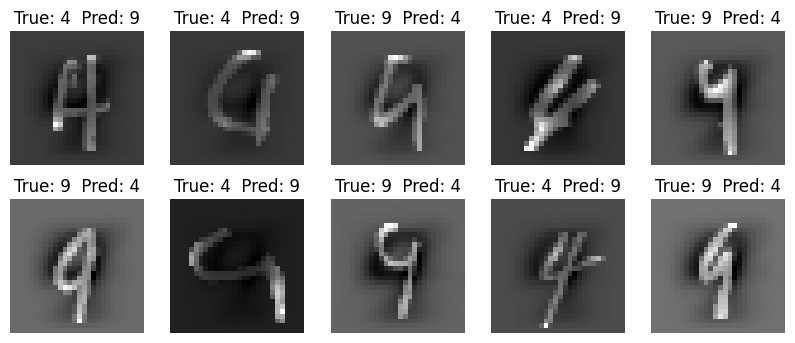

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Normalize on the training data to avoid data leakage.
X_train, stats = normalize(X_train, method="zscore", return_stats=True)
X_test = normalize(X_test, method="zscore", stats=stats)

model = MLPClassifier(hidden_layer_sizes=(8,), lr=0.1, random_state=42, tol=1e-5)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)


errors = (results != y_test)
X_err = X_test[errors]
y_err = y_test[errors]
y_pred_err = results[errors]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    y_err_val = 4
    if y_err[i] == 1:
        y_err_val = 9

    y_pred_err_val = 4
    if y_pred_err[i] == 1:
        y_pred_err_val = 9
    ax.imshow(X_err[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_err_val}  Pred: {y_pred_err_val}")
    ax.axis("off")
